# Final Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from IPython.display import display

#SK-learn libraries for setup
from sklearn.model_selection import train_test_split

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/nwchen24/anaconda/envs/Machine_learning_python2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Read data
os.chdir("/Users/nwchen24/Desktop/UC_Berkeley/machine_learning/github_repo/Winter2017_Section_3/NC_Work/Final_Project/Data/")

train_data_full = pd.read_csv('train.csv')
train_data_full.head()

#Split into train and development
train_data, dev_data = train_test_split(train_data_full, random_state = 0)


## EDA

In [3]:
#Add a string desctriptor for weather
weather_values = [1,2,3,4]
weather_descriptions = ['Nice Weather', 'OK Weather', 'Poor Weather', 'Bad Weather']
weather_dict_df = pd.DataFrame({'weather' : weather_values, 'weather_descriptions': weather_descriptions})

weather_dict_df
train_data = pd.merge(train_data, weather_dict_df, how = 'left')

#Add a string descriptor for season
season_values = [1,2,3,4]
season_str = ['Spring', 'Summer', 'Fall', 'Winter']
season_dict_df = pd.DataFrame({'season' : season_values, 'season_str': season_str})

train_data = pd.merge(train_data, season_dict_df, how = 'left')

train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_descriptions,season_str
0,2012-12-09 17:00:00,4,0,0,3,14.76,17.425,93,8.9981,20,209,229,Poor Weather,Winter
1,2011-06-19 00:00:00,2,0,0,1,28.70,32.575,65,0.0000,18,71,89,Nice Weather,Summer
2,2012-05-10 19:00:00,2,0,1,1,22.14,25.760,37,23.9994,84,469,553,Nice Weather,Summer
3,2011-12-06 08:00:00,4,0,1,2,18.86,22.725,94,12.9980,13,401,414,OK Weather,Winter
4,2011-04-17 08:00:00,2,0,0,1,15.58,19.695,46,26.0027,7,36,43,Nice Weather,Summer


In [10]:
train_data[(train_data['count'] < 50)].count()

datetime                2211
season                  2211
holiday                 2211
workingday              2211
weather                 2211
temp                    2211
atemp                   2211
humidity                2211
windspeed               2211
casual                  2211
registered              2211
count                   2211
weather_descriptions    2211
season_str              2211
dtype: int64

In [5]:

train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,8164.000000,8164.000000,8164.000000,8164.00000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000,8164.000000
mean,2.496570,0.029030,0.679936,1.41389,20.137509,23.551758,61.836722,12.832602,35.762371,154.923199,190.685571
std,1.118645,0.167901,0.466529,0.63025,7.776977,8.463277,19.239196,8.262360,49.826465,151.318558,181.191213
min,1.000000,0.000000,0.000000,1.00000,0.820000,2.275000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.00000,13.940000,16.665000,47.000000,7.001500,4.000000,36.000000,43.000000
50%,2.000000,0.000000,1.000000,1.00000,20.500000,24.240000,62.000000,12.998000,16.000000,116.000000,142.000000
75%,3.000000,0.000000,1.000000,2.00000,26.240000,31.060000,77.000000,16.997900,48.000000,223.000000,284.000000
max,4.000000,1.000000,1.000000,4.00000,41.000000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


### Univariate Plots

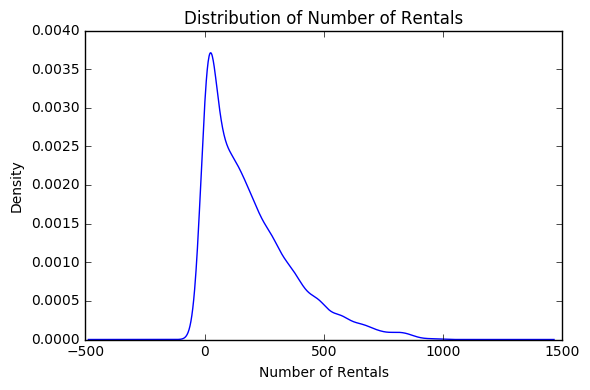

In [6]:
#Look at the count variable
#Number of Rentals
plt.figure()
train_data['count'].plot(kind = 'density')
plt.title('Distribution of Number of Rentals')
plt.xlabel('Number of Rentals')

plt.tight_layout()
plt.show()


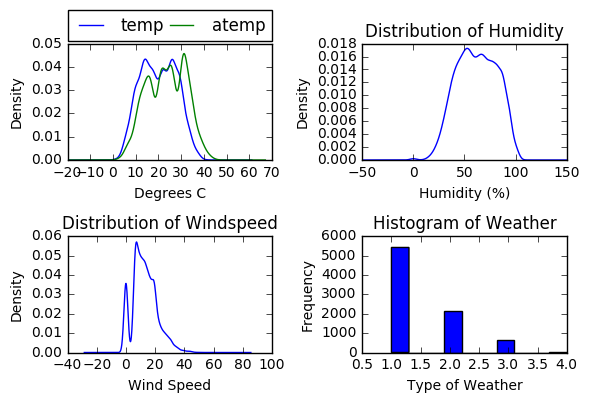

In [7]:
#Temperatures
plt.subplot(2,2,1)
train_data['temp'].plot(kind = 'density')
train_data['atemp'].plot(kind = 'density')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('Degrees C')

#Humidity
plt.subplot(2,2,2)
train_data['humidity'].plot(kind = 'density')
plt.title('Distribution of Humidity')
plt.xlabel('Humidity (%)')

#Windspeed
plt.subplot(2,2,3)
train_data['windspeed'].plot(kind = 'density')
plt.title('Distribution of Windspeed')
plt.xlabel('Wind Speed')

#Weather
plt.subplot(2,2,4)
train_data['weather'].plot(kind = 'hist')
plt.title('Histogram of Weather')
plt.xlabel('Type of Weather')

plt.tight_layout()
plt.show()

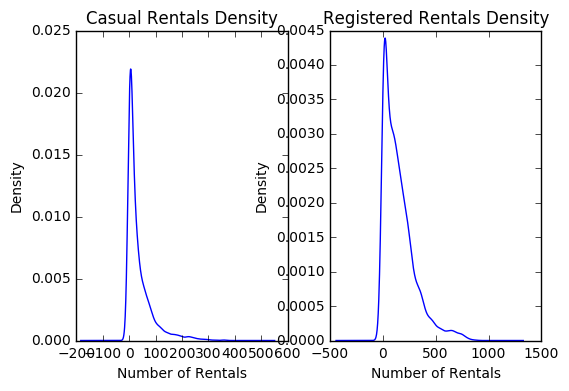

In [8]:
#Look at distributions of casual rentals vs. registered rentals
plt.figure()

#Casual
plt.subplot(1,2,1)
train_data['casual'].plot(kind = 'density')
plt.xlabel('Number of Rentals')
plt.title('Casual Rentals Density')

#Registered
plt.subplot(1,2,2)
train_data['registered'].plot(kind = 'density')
plt.xlabel('Number of Rentals')
plt.title('Registered Rentals Density')

plt.show()

### Bivariate Plots

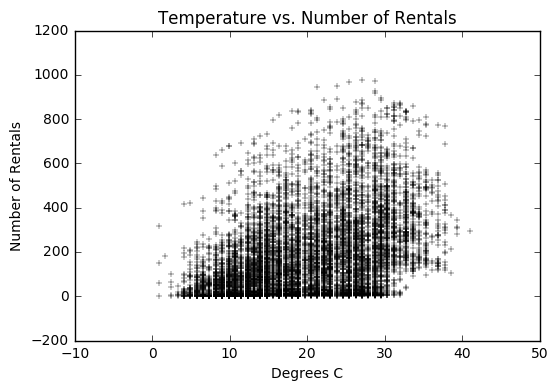

In [9]:
#Temperature vs. Number of Rentals
plt.figure()
train_data.plot(x = 'temp', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Temperature vs. Number of Rentals')
plt.xlabel('Degrees C')
plt.ylabel('Number of Rentals')

plt.show()


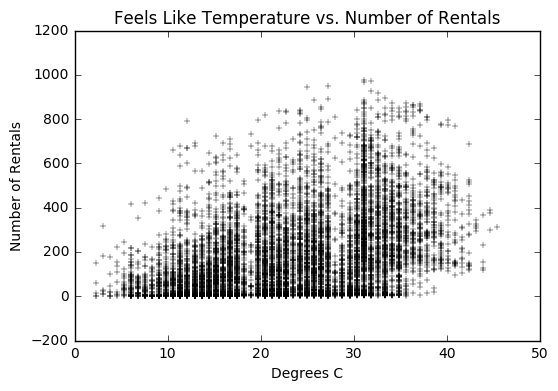

In [10]:
#Feels Like Temperature vs. Number of Rentals
plt.figure()
train_data.plot(x = 'atemp', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Feels Like Temperature vs. Number of Rentals')
plt.xlabel('Degrees C')
plt.ylabel('Number of Rentals')

plt.show()


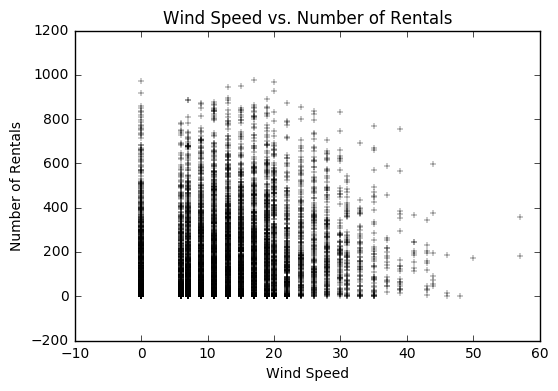

In [11]:
#Wind Speed vs. Number of Rentals
plt.figure()
train_data.plot(x = 'windspeed', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Wind Speed vs. Number of Rentals')
plt.xlabel('Wind Speed')
plt.ylabel('Number of Rentals')

plt.show()

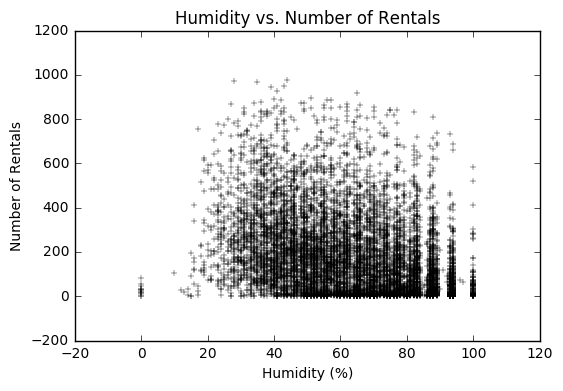

In [12]:
#Humidity vs. Number of Rentals
plt.figure()
train_data.plot(x = 'humidity', y = 'count', kind = 'scatter', marker = '+', linewidths = .3, c = 'black')
plt.title('Humidity vs. Number of Rentals')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Rentals')

plt.show()

Poor weather has the highest density of zero and very low rentals

In [27]:
#rentals grouped by weather type
plt.figure()
train_data.groupby(by = ['weather'])['count'].plot(kind='density')
plt.legend()
plt.title('Number of Rentals by Weather Type')
plt.xlabel('Number of Rentals')
plt.show()


ValueError: `dataset` input should have multiple elements.

In [16]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_descriptions,season_str
0,2012-12-09 17:00:00,4,0,0,3,14.76,17.425,93,8.9981,20,209,229,Poor Weather,Winter
1,2011-06-19 00:00:00,2,0,0,1,28.70,32.575,65,0.0000,18,71,89,Nice Weather,Summer
2,2012-05-10 19:00:00,2,0,1,1,22.14,25.760,37,23.9994,84,469,553,Nice Weather,Summer
3,2011-12-06 08:00:00,4,0,1,2,18.86,22.725,94,12.9980,13,401,414,OK Weather,Winter
4,2011-04-17 08:00:00,2,0,0,1,15.58,19.695,46,26.0027,7,36,43,Nice Weather,Summer


Fall, Winter, and Summer seem to have more days with higher rental totals

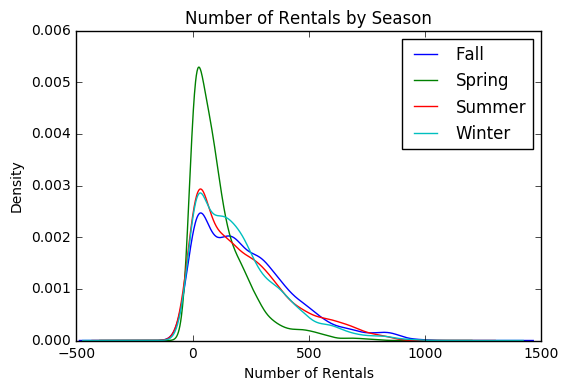

In [25]:
#rentals grouped by season
plt.figure()
train_data.groupby(by = ['season_str'])['count'].plot(kind='density')
plt.legend()
plt.title('Number of Rentals by Season')
plt.xlabel('Number of Rentals')
plt.show()

Holidays and Non-Holidays look pretty similar

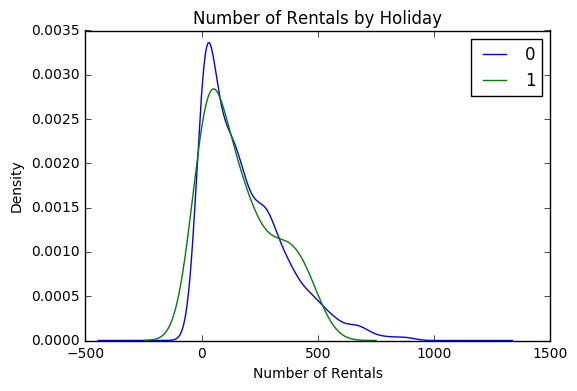

In [129]:
#rentals grouped by holiday or not
plt.figure()
train_data.groupby(by = ['holiday'])['count'].plot(kind='density')
plt.legend()
plt.title('Number of Rentals by Holiday')
plt.xlabel('Number of Rentals')
plt.show()

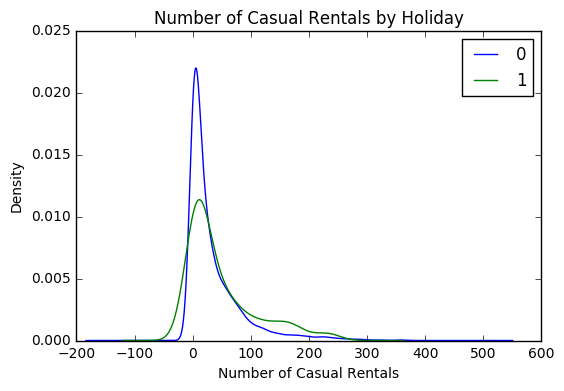

In [29]:
#Number of casual rentals grouped by holiday or not
plt.figure()
train_data.groupby(by = ['holiday'])['casual'].plot(kind='density')
plt.legend()
plt.title('Number of Casual Rentals by Holiday')
plt.xlabel('Number of Casual Rentals')
plt.show()

### Temporal Plots

In [40]:
#Turn the data into a time series dataset
train_data_ts = train_data.set_index('datetime')

train_data_ts.index.name = None

#sort
train_data_ts.sort_index(axis = 0, inplace = True)

train_data_ts.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weather_descriptions,season_str
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Nice Weather,Spring
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Nice Weather,Spring
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Nice Weather,Spring
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Nice Weather,Spring
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Nice Weather,Spring


It appears that the rental program is growing over time throughout the data, or at least the variance is increasing over time. This means that we should be sure to include some sort of age variable in our predictions. It appears that the data points with the most rentals are all toward the end of the data.

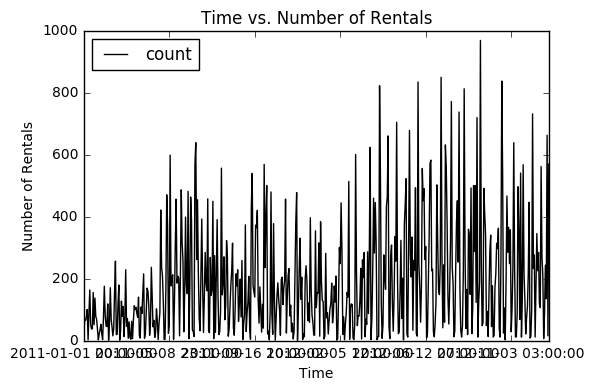

In [41]:
#Time series plot of rentals
#get subset of only every 15th observation
train_data_ts_fifth_obs = train_data_ts.iloc[::15,]

plt.figure()
train_data_ts_fifth_obs.plot(y = 'count', c = 'black')
plt.title('Time vs. Number of Rentals')
plt.xlabel('Time')
plt.ylabel('Number of Rentals')

plt.show()